In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ADVANCED STATISTICS PROJECT


### Problem 1A:

### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

### Read and View the Data

In [2]:
sal=pd.read_csv("SalaryData.csv")

In [3]:
sal.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

### Exploratory Data Analysis

In [4]:

print('Number of rows in the dataset = %d' % (sal.shape[0]))
print('Number of columns in the dataset = %d' % (sal.shape[1]))

Number of rows in the dataset = 40
Number of columns in the dataset = 3


### Checking for Missing values

In [208]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
sal.isna().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

* The data has 40 rows and 3 columns, where Education and Occupation are categorical while Salary is numerical.
* The data has no missing values.

### Descriptive Statistics for the dataset:

In [207]:
sal.describe().T

count        mean           std      min      25%       50%  \
Salary   40.0  162186.875  64860.407506  50103.0  99897.5  169100.0   

              75%       max  
Salary  214440.75  260151.0

* Since salary is the only numerical parameter therfore the descriptive statistics are as follows:
 * Average Salary is 162186.875
 * The minimum Salary that the Employee earns is 50103 and maximum is 260151.

### Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode if necessary.

In [5]:
sal.Education.unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [12]:
sal.Occupation.unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

In [212]:
sal.Salary.unique()

array([153197, 115945, 175935, 220754, 170769, 219420, 237920, 160540,
       180934, 248156, 247724, 249207, 235334, 248871, 257345, 160910,
       162494, 188729,  99185,  90135, 100135, 133696, 149909, 191712,
       167431, 260151,  50103,  50122,  52242,  75333,  77743,  83203,
        90456, 100678,  95469, 173935, 212448, 173664, 212760, 212781],
      dtype=int64)

In [214]:
dups = sal.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

sal[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Education, Occupation, Salary]
Index: []

### Observation

* The Data presented is a good data with no missing, duplicated data.

### 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#### Hypothesis for Eductaion 

H $_0 $(Null Hypothesis) = $ \mu$(Doctorate) = $\mu$(Bachelors) = $\mu$(HS-grad)

H $_a$(Alternate Hypothesis) = Atleast one pair of means is not equal

#### Hypothesis for Occupation 

H $_0 $(Null Hypothesis) = $ \mu$(Adm-clerical) = $\mu$(Sales) = $\mu$(Prof-specialty) =  $\mu$(Exec-managerial)

H $_a$(Alternate Hypothesis) = Atleast one pair of means is not equal



#### [_Here $\mu$ for Occupation and Education is taken in context to the Salary each receives_]

### 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [6]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

### Fitting a model to perform the ANOVA test.

In [7]:
formula = 'Salary~C(Education)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


`pvalue`=1.257709e-08 is smaller than the level of significance $\alpha$ 0.05

`The null hypothesis is rejected based on the above observation and it is concluded that the mean salary is not same across all 3 Education Levels`

### 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

### Fitting a model to  perform the ANOVA test.

In [17]:
formula = 'Salary~C(Occupation)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


`pvalue`=0.458508 is greater than the level of significance $\alpha$ 0.05

`We have insufficient evidence to reject the Null Hypothesis based on the above observation and it is concluded that the mean salary is the same across all 4 Occupations`

### 4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

Checking the class means for Occupation and Education

In [8]:
sal.groupby("Occupation")["Salary"].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

In [39]:
sal.groupby("Education")["Salary"].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

In [38]:
sal.Salary.mean()

162186.875

`Population mean of Salary`= ~162187

`As it is observed that the individual means for Occupation lie closer to the populaton mean, hence the Null Hypothesis holds True for mean Salary for Occuaption`

`However it is observed that the individual means for Education have a wider spread in ranges to the populaton mean, hence the Null Hypothesis is rejected for mean Salary for Education`

### Problem 1B:

### 1. What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

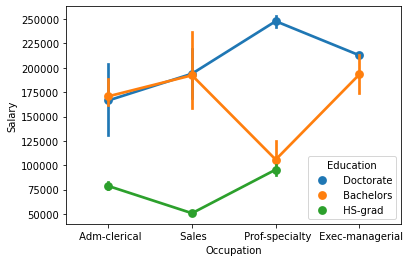

In [51]:
sns.pointplot(x="Occupation",y="Salary",hue="Education",data=sal);

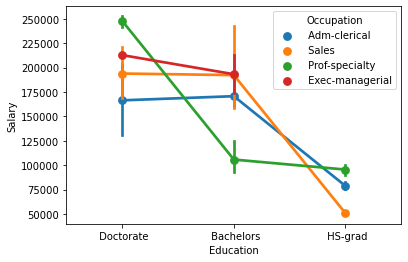

In [253]:
sns.pointplot(hue="Occupation",y="Salary",x="Education",data=sal);

* From the pointplots, it is observed that there is strong interaction between both Education and Occupation based on Salary.
* A HS grad has the least salary as compared to other Education variables which is expected as an HS grad has the least work experience therefore are paid accordingly.
* Apart from that the individuals having a Doctorate or Bachelors are earning the same for Adm-clerical and Sales roles.
* However for Prof-Speciality, individuals with a Doctorate are the pinnacle as far as salary is compared which is way higher than those who have a Bachelors or an HS grad who are earning almost the same.
* For Exec-managerial it is observed the individuals having a Doctorate or Bachelors have almost an equivalent earning.
* In terms of Exec-managerial, it is also observed that this Occupation demands a highly qualified individual, therefore this role is not presented to anyy candidate whos only as HS-grad.

* The ANOVA test performed in the next step further confirms of the strong interation between the variables.

### 2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

### Fitting a model to perform the ANOVA test.

In [53]:
formula = 'Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


pvalue of interaction =  2.232500e-05  is smaller than the level of significance  𝛼  0.05

We have sufficient evidence to reject the Null Hypothesis based on the above observation and it can be concluded that there is a strong interaction and can be used to devise inferences from the model.

### 3. Explain the business implications of performing ANOVA for this particular case study.

* ANOVA enables companies to identify problems, trends, risks, and opportunities that impact both short and long-term viability.
* Anova for this case is the best method as initially without ANOVA it would be impossible for us to closely examine how salary is related to the Education qualification and the Occupation.
* Moreover using ANOVA we could get a better understanding by calculating the combined interaction effect of tye variables Education and Occupation to salary.
* We can derive inferences from the dataset like which variable varies with the other as observed in the pointplot above:
 * An individual who is only a HS-grad earns the least therefore it is better understood that every business prefers a highly educated individual as the effort in training the individuals with a Doctorate or Bachelors is comparatively less.
 * Moreover these individuals possess professional skills which can add to the business, hence are paid a higher amount.
 * Therefore it is preferred for the candidate to have a better Education qualification.
 
* For an individual with Bachelors is better advised not to choose prof-speciality as a profession as they cannot add higher value to the business as Doctorate individuals are the ones who have specialized in that field therefore there salary are the highest out of all professions.
 

## Problem 2:

## The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [9]:
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

### Read and View Data

In [10]:
d_edu=pd.read_csv("Education+-+Post+12th+Standard.csv")

In [11]:
d_edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

### Column Info

1)      Names: Names of various university and colleges

2)      Apps: Number of applications received

3)      Accept: Number of applications accepted

4)      Enroll: Number of new students enrolled

5)      Top10perc: Percentage of new students from top 10% of Higher Secondary class

6)      Top25perc: Percentage of new students from top 25% of Higher Secondary class

7)      F.Undergrad: Number of full-time undergraduate students

8)      P.Undergrad: Number of part-time undergraduate students

9)      Outstate: Number of students for whom the particular college or university is Out-of-state tuition

10)   Room.Board: Cost of Room and board

11)   Books: Estimated book costs for a student

12)   Personal: Estimated personal spending for a student

13)   PhD: Percentage of faculties with Ph.D.’s

14)   Terminal: Percentage of faculties with terminal degree

15)   S.F.Ratio: Student/faculty ratio

16)   perc.alumni: Percentage of alumni who donate

17)   Expend: The Instructional expenditure per student

18)   Grad.Rate: Graduation rate


In [215]:
print('Number of rows in the dataset = %d' % (d_edu.shape[0]))
print('Number of columns in the dataset = %d' % (d_edu.shape[1]))

Number of rows in the dataset = 777
Number of columns in the dataset = 18


### Descriptive Statistics for the dataset:

In [67]:
d_edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

### Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode if necessary.

In [68]:
d_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [217]:
d_edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [218]:
dups = d_edu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

sal[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Education, Occupation, Salary]
Index: []

* The data has 777 rows and 18 columns, where Names is categorical while others are numerical.
* The data has no missing values nor any duplicate rows.

## EDA

### Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### Univariate Analysis

Let us define a function **'univariateAnalysis_numeric'** to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [15]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(d_edu[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(d_edu[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=d_edu[column])
    plt.show()

In [12]:
df_num = d_edu.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))


Total Numerical Columns =  17


In [13]:
df_cat = d_edu.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
print("Categorical Column = " ,lstcatcolumns)

Categorical Column =  ['Names']


### Further working will mostly be performed on the numerical data

In [97]:
df_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


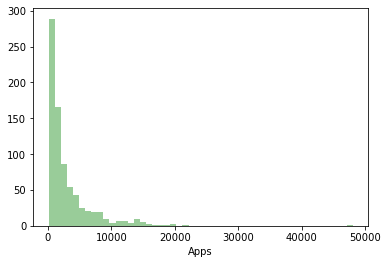

BoxPlot of Apps
----------------------------------------------------------------------------


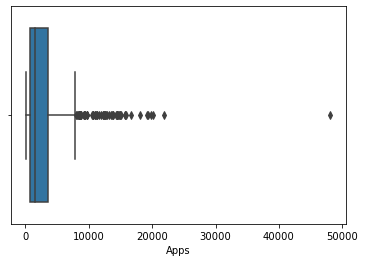

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


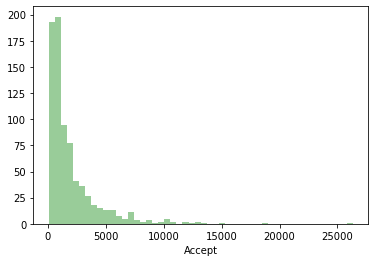

BoxPlot of Accept
----------------------------------------------------------------------------


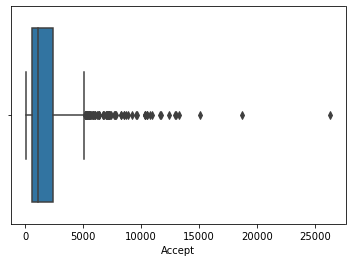

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


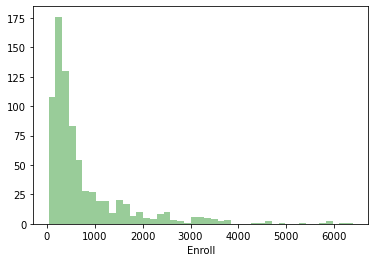

BoxPlot of Enroll
----------------------------------------------------------------------------


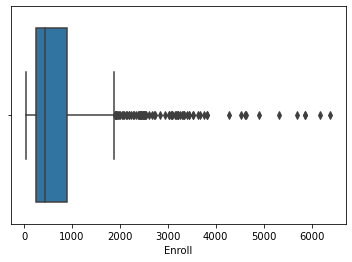

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


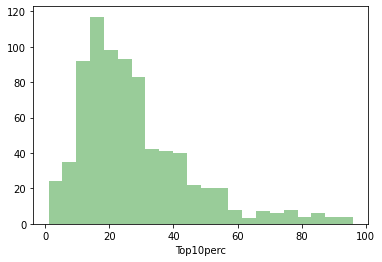

BoxPlot of Top10perc
----------------------------------------------------------------------------


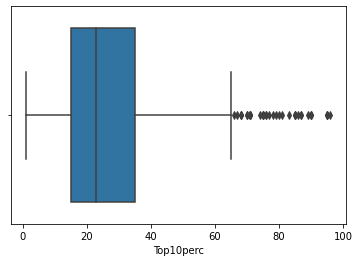

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


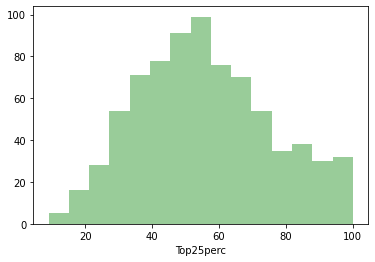

BoxPlot of Top25perc
----------------------------------------------------------------------------


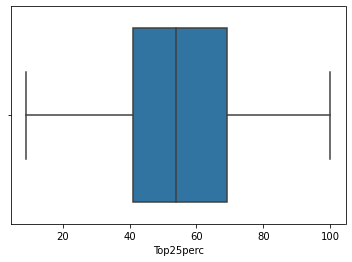

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


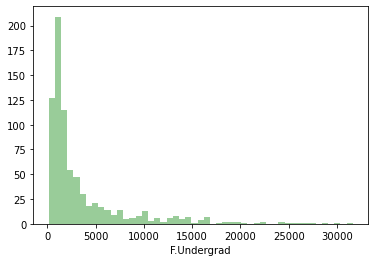

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


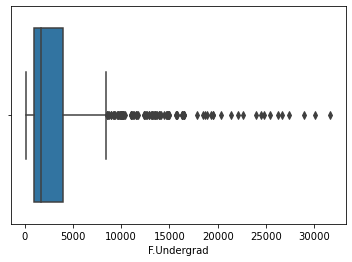

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


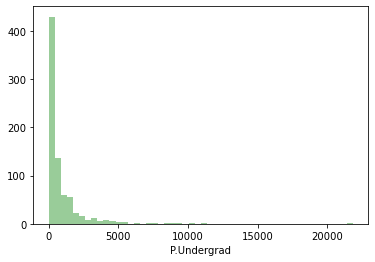

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


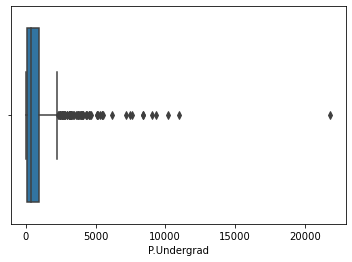

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


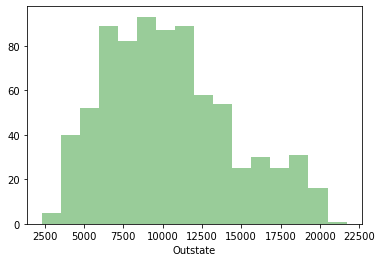

BoxPlot of Outstate
----------------------------------------------------------------------------


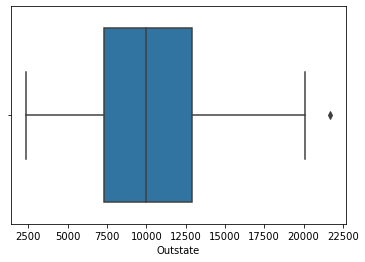

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


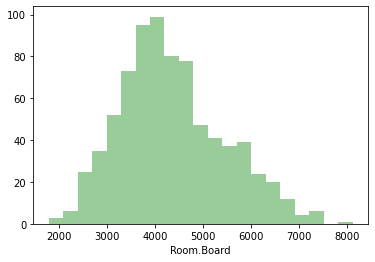

BoxPlot of Room.Board
----------------------------------------------------------------------------


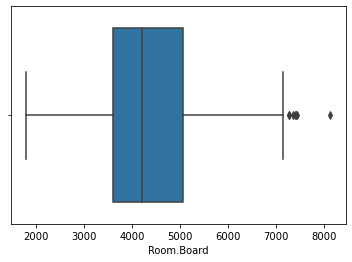

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


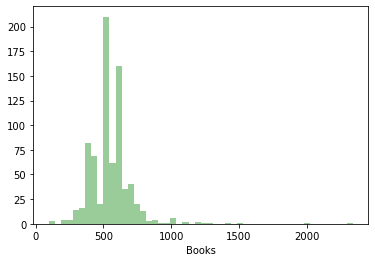

BoxPlot of Books
----------------------------------------------------------------------------


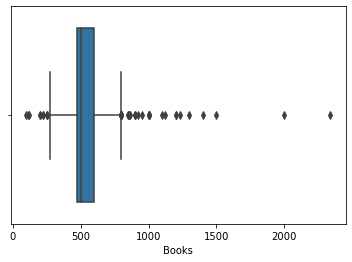

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


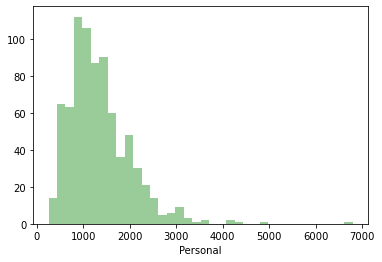

BoxPlot of Personal
----------------------------------------------------------------------------


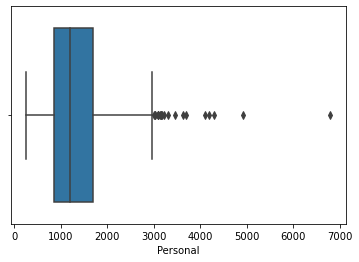

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


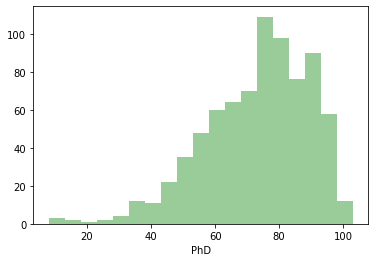

BoxPlot of PhD
----------------------------------------------------------------------------


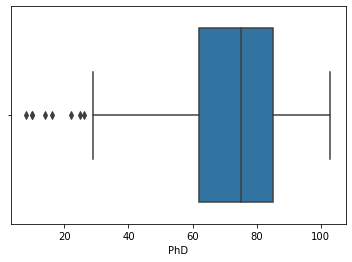

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


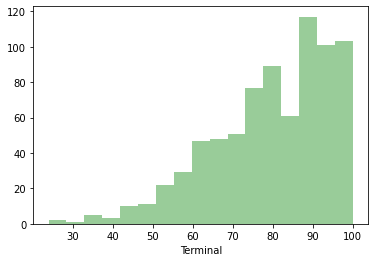

BoxPlot of Terminal
----------------------------------------------------------------------------


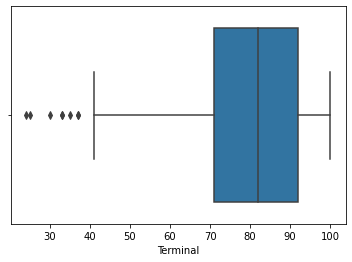

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


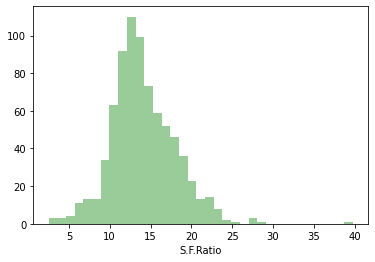

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


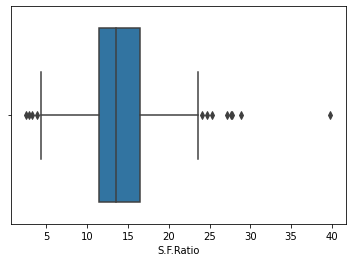

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


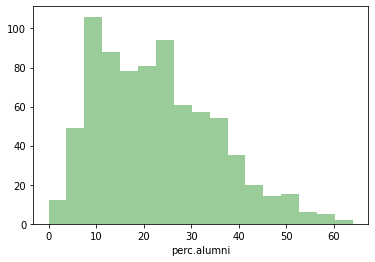

BoxPlot of perc.alumni
----------------------------------------------------------------------------


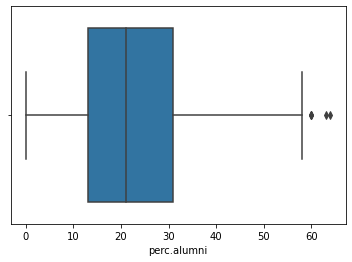

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


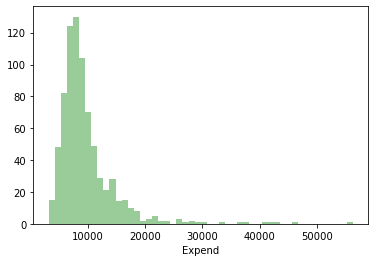

BoxPlot of Expend
----------------------------------------------------------------------------


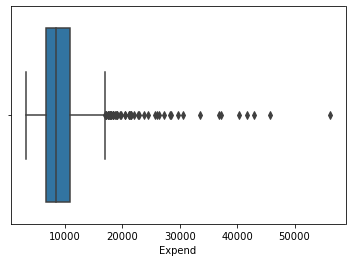

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


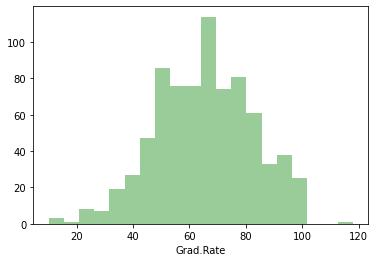

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


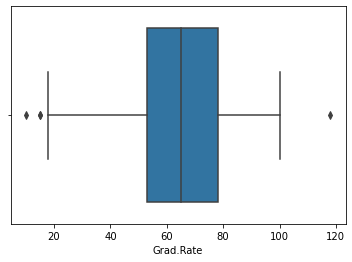

In [16]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Observations

*  There are `17` numeric fields in the data

* Number of Applicants received ranges from `81` to `48094` per year

- Number of Applicants accepted ranges from `72` to `26330` per year

- Number of Applicants enrolled ranges from `35` to `6392` per year 

- Percentage of new students from top 10% of Higher Secondary class ranges from `1` to `96`

- Percentage of new students from top 25% of Higher Secondary class ranges from `9` to `100`

- Number of full-time undergraduate students range from `139` to `31643` 

- Number of part-time undergraduate students range from `1` to `21836`

- Number of students for whom the particular college or university is Out-of-state tuition range from `2340` to `21700`

- Cost of Room and board range from `1780` to `8124`

- Estimated book costs for a student ranges from `96` to `2340`

- Estimated personal spending for a student ranges from `250` to `6800`

- Percentage of faculties with Ph.D.’s ranges from `8` to `103`

- Percentage of faculties with terminal degree ranges from `24` to `100`

- Student/faculty ratio ranges from `2.5` to `39.8`

- Percentage of alumni who donate `0` to `64`

- The Instructional expenditure per student ranges from `3186` to `56233`

- Graduation Rate Ranges from `10` to `118`

- Outliers are present and to be treated only Top25Perc column has no outlier present.



### Bivariate Analysis

In [17]:
corr = df_num.corr(method='pearson')

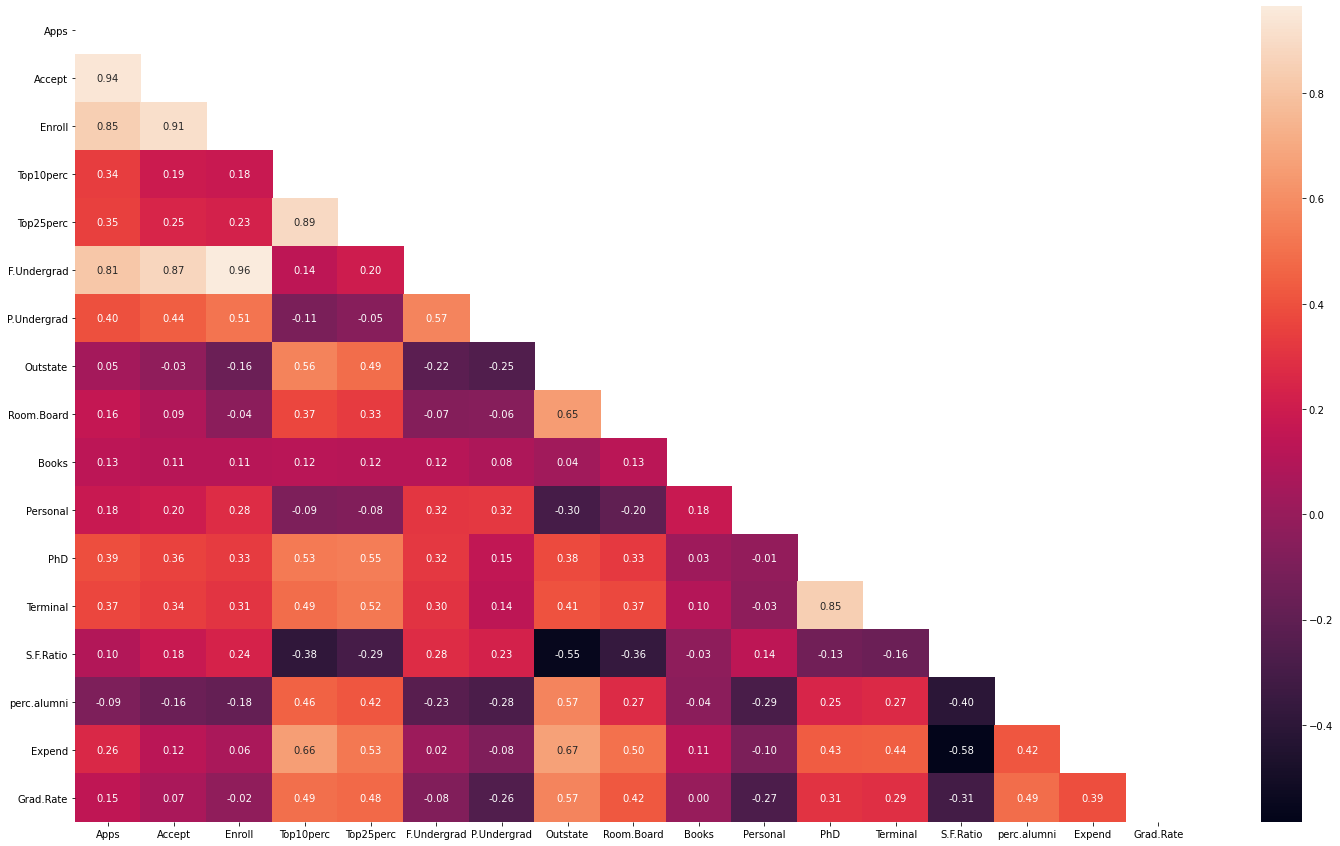

In [18]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

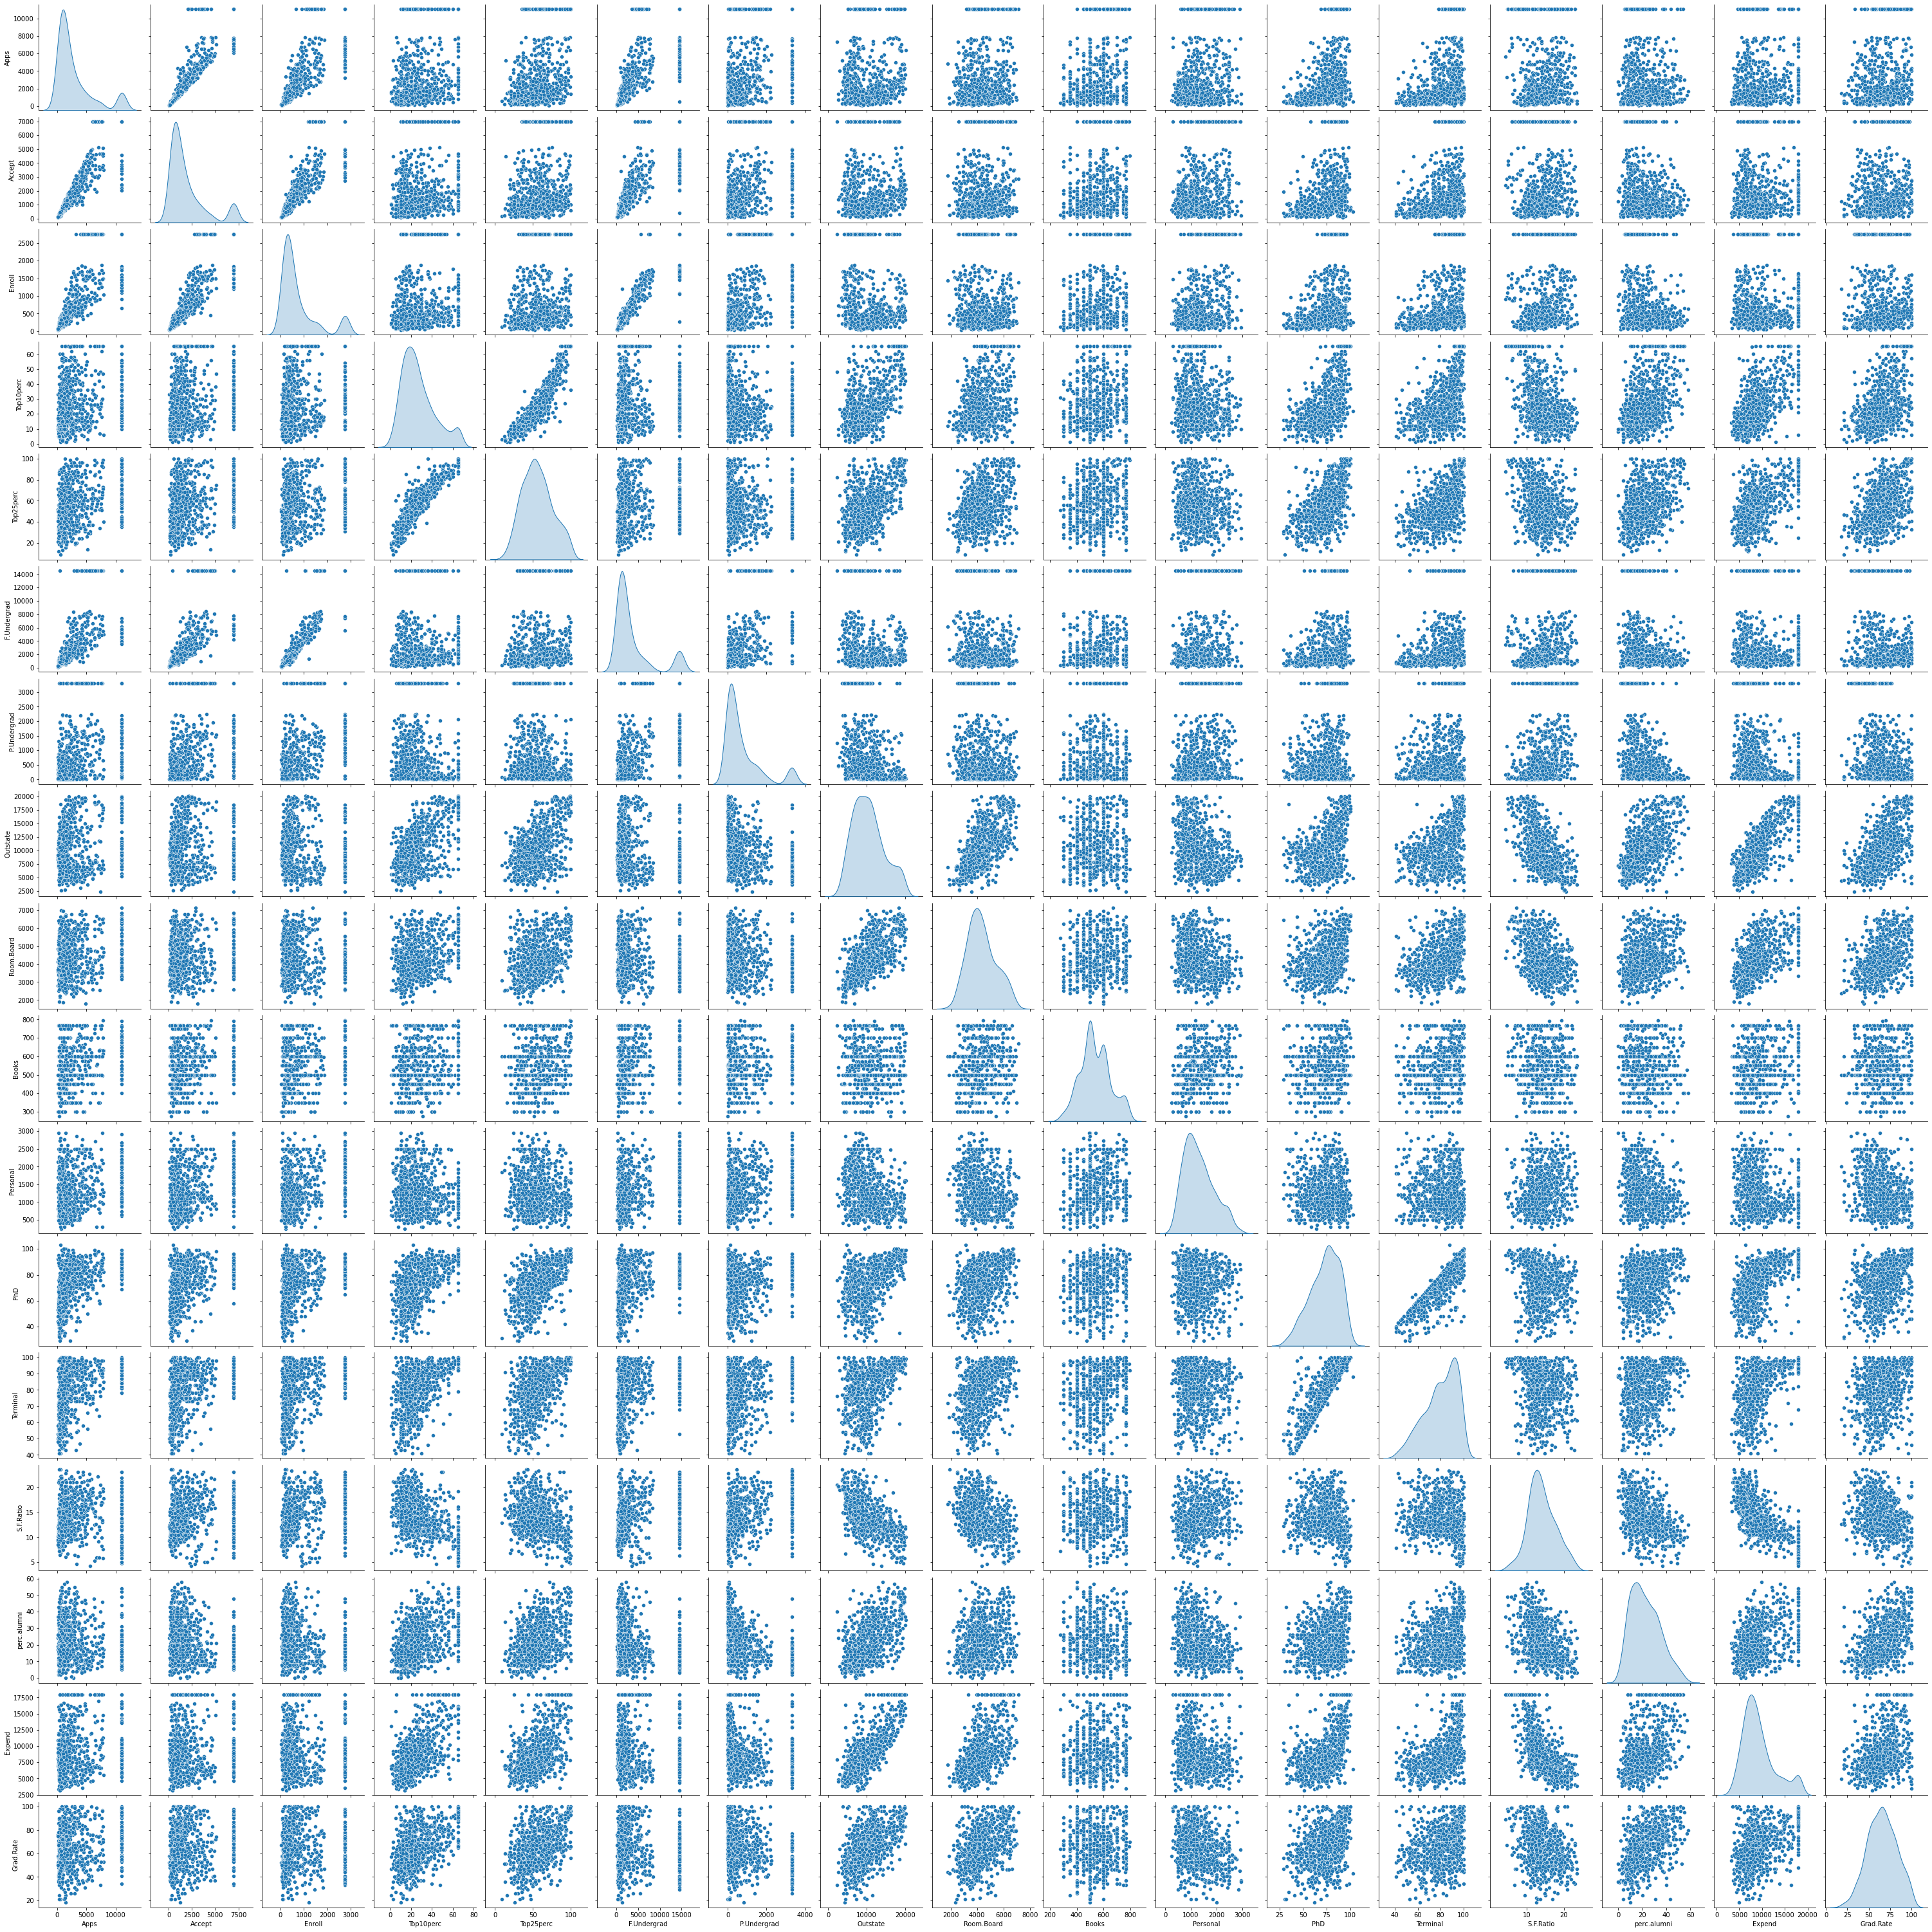

In [185]:
sns.pairplot(df_num,diag_kind='kde');

* There is a high positive correlation between the Applicants and the Enrollment of 0.91 and also between F.Undrgrad and Enrollment having correnlation of 0.96 apart from that the majority of correlations are weak or fairly strong.

### Outlier Treatment

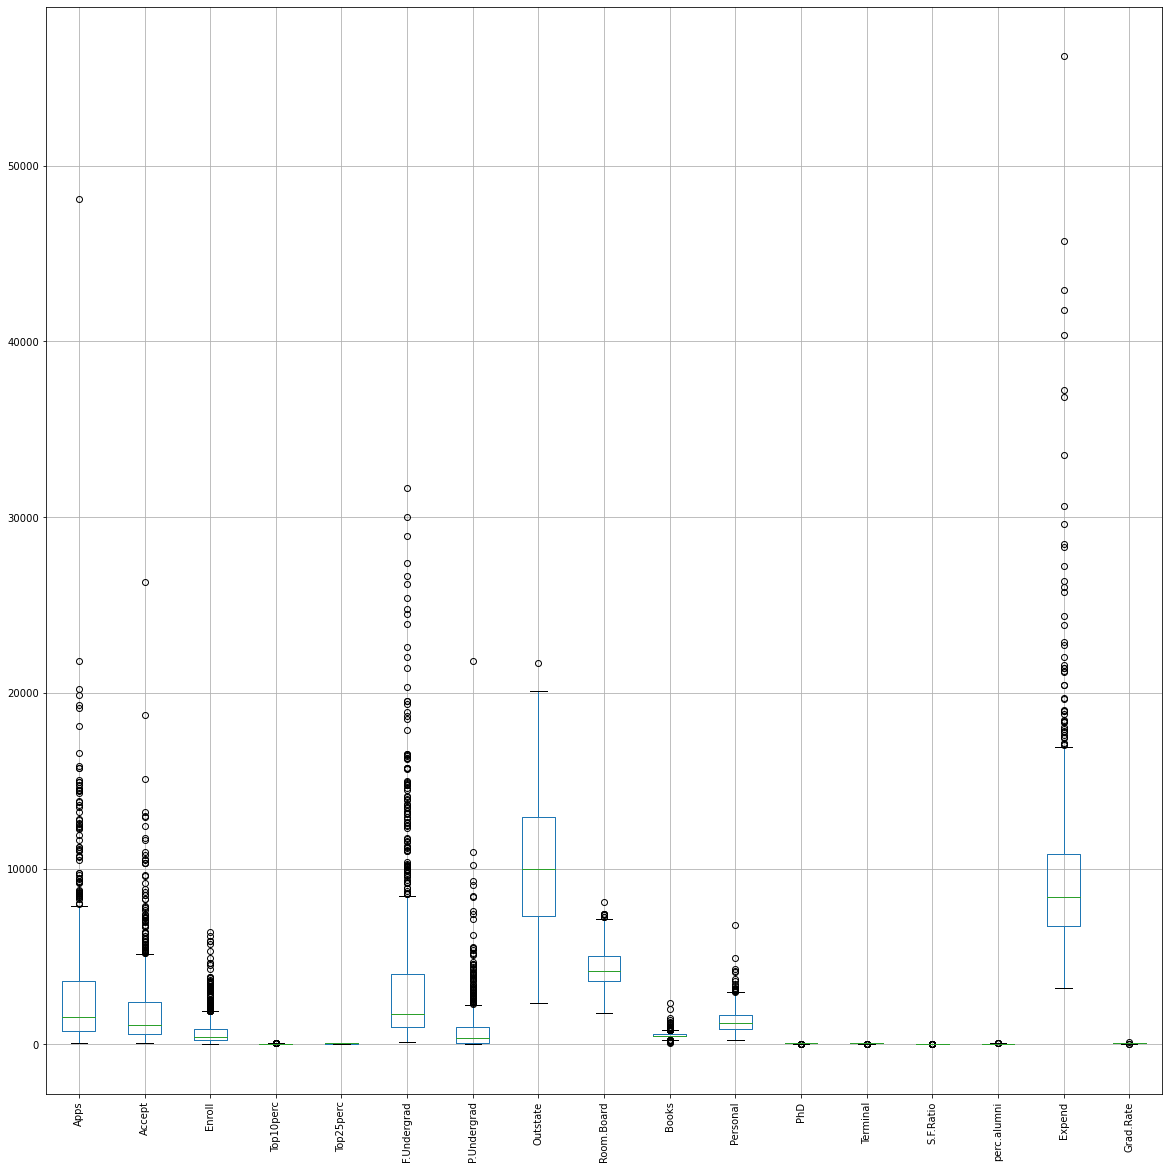

In [19]:
d_edu.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

* Top25perc is the only variable with no outliers present

In [22]:
no_outlier=["Top25perc"]


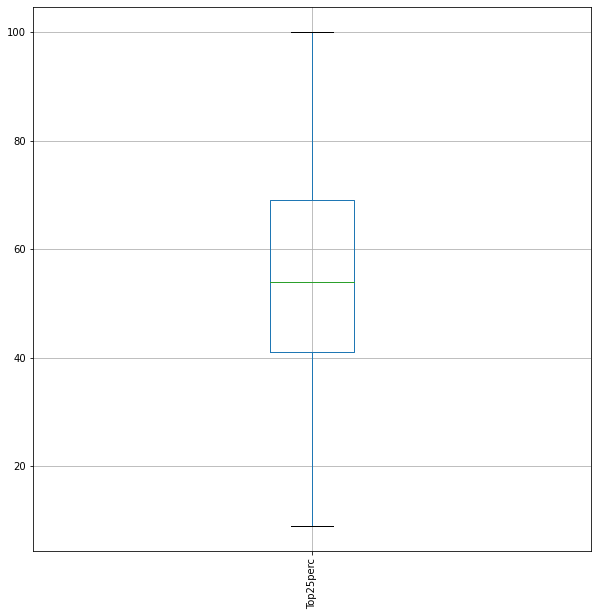

In [191]:
df_num[no_outlier].boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

To treat outliers lets define a function **'treat_outlier'**. 

- For the higher outliers we will treat it to get it at 95 percentile value. 

- Lower level outliers will be treated to get it at 5 percentile value.

In [20]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [23]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [24]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

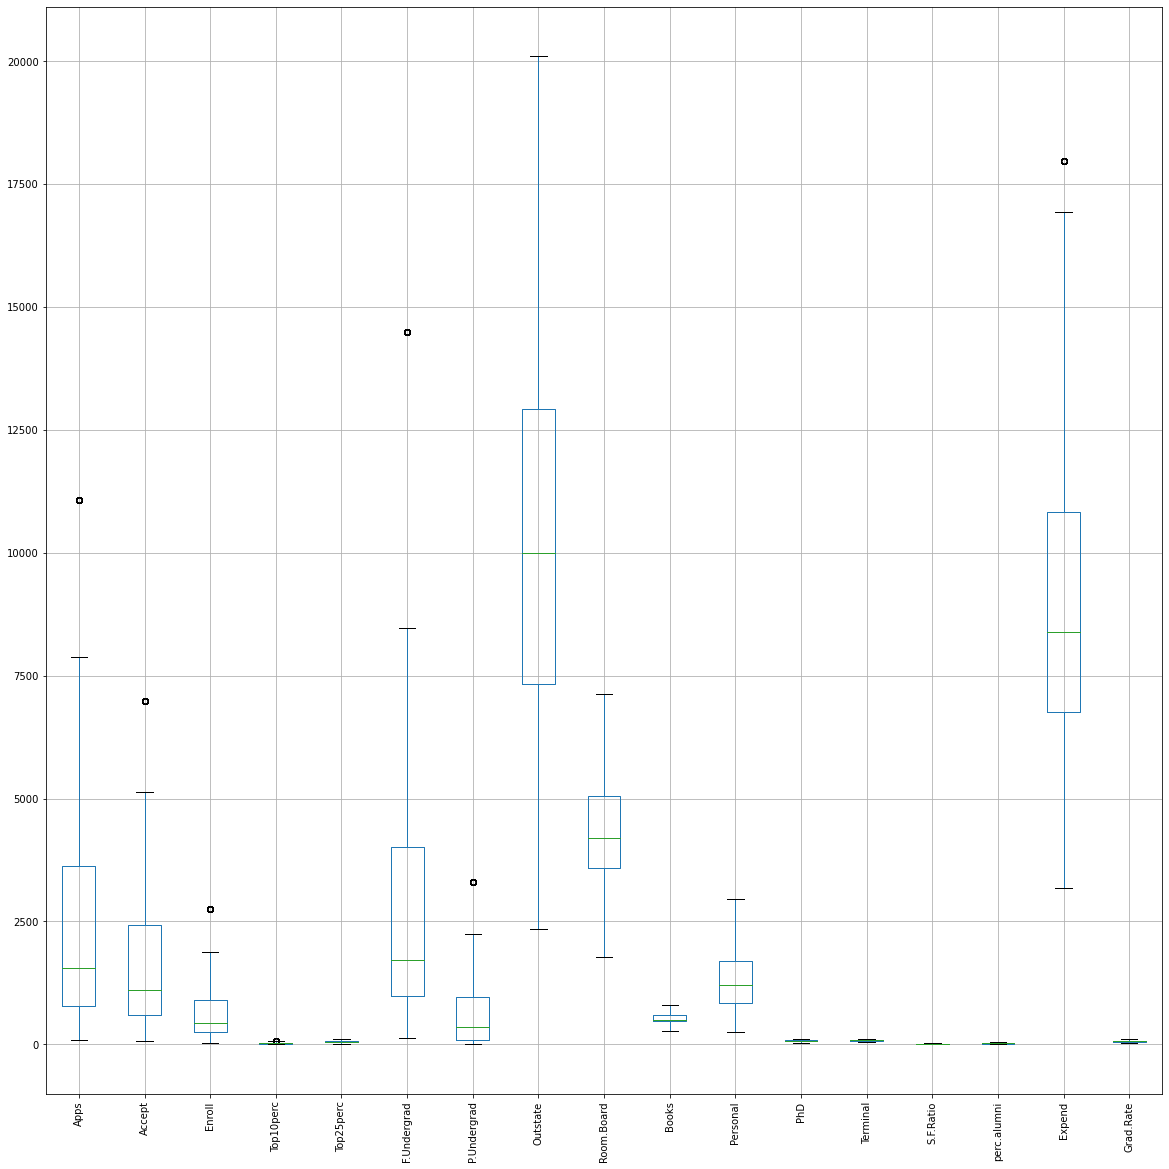

In [25]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

* As observed most of the outliers are treated, but we still have some variables with outliers.

### PCA

In [144]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


### Is scaling necessary for PCA in this case? Give justification and perform scaling.

Yes Scaling is necessary, as we want to transform our data so that it fits within a specific scale, like 0-1 or 1-10.
This makes for easier calculations and scaling makes it easier to remove or detect the anomalities present in the data.

In [26]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
print("Data after SCALING is successfully performed.")
df_num_scaled.head()

Data after SCALING is successfully performed.


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.383829 -0.353198 -0.035012  -0.247034  -0.191827    -0.179951   
1 -0.215156  0.003214 -0.302696  -0.695834  -1.353911    -0.225740   
2 -0.458225 -0.422730 -0.528115  -0.311148  -0.292878    -0.599082   
3 -0.782423 -0.807984 -0.782992   2.125195   1.677612    -0.718316   
4 -0.854253 -0.912539 -0.888017  -0.695834  -0.596031    -0.777479   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.220908 -0.747173   -0.976849 -0.807146  1.534067 -0.189281 -0.135735   
1     0.513397  0.459655    1.959843  1.912681  0.325766 -2.826575 -1.917777   
2    -0.687032  0.202830   -0.557322 -1.260450 -0.252493 -1.282793 -0.984326   
3    -0.725344  0.629209    1.027560 -0.807146 -0.753075  1.225853  1.207869   
4     0.132410 -0.717252   -0.212377  2.054112  0.325766  0.196665 -0.560031   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.107193    -0.877388 -0.621979  -0.327324  
1  -0.502762    -0.547691  0.361374  -0.564340  
2  -0.311750     0.606247 -0.144125  -0.682848  
3  -1.730694     1.183216  2.462296  -0.386578  
4  -0.584624    -1.701629  0.472798  -1.690169

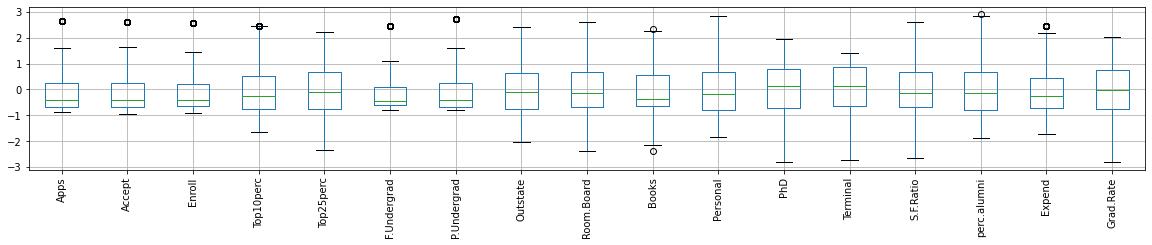

In [27]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()


### Comment on the comparison between the covariance and the correlation matrices from this data.


In [28]:
print("_______________________________COVARIANCE MATRIX______________________________________\n\n")
cov_mat = np.cov(df_num_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %np.round(eig_vecs,2))
print('\nEigenvalues \n%s' %np.round(eig_vals,2))


_______________________________COVARIANCE MATRIX______________________________________


Eigenvectors 
[[ 0.24  0.32  0.1  -0.1   0.23 -0.05  0.01 -0.03 -0.18 -0.13 -0.07 -0.15
   0.57  0.03  0.35 -0.48 -0.03]
 [ 0.21  0.36  0.13 -0.12  0.2  -0.03 -0.   -0.1  -0.19 -0.12 -0.03  0.45
  -0.64 -0.04  0.11 -0.21 -0.13]
 [ 0.16  0.4   0.09 -0.01  0.17  0.04  0.01 -0.13 -0.05 -0.05 -0.02 -0.75
  -0.26  0.03 -0.23  0.27 -0.02]
 [ 0.34 -0.08 -0.07  0.38  0.15  0.08  0.26  0.29  0.11 -0.07 -0.01  0.06
  -0.05  0.72 -0.03 -0.02  0.05]
 [ 0.34 -0.04 -0.05  0.43  0.12  0.02  0.23  0.34  0.19 -0.05 -0.13 -0.01
  -0.   -0.66  0.03  0.03 -0.16]
 [ 0.13  0.41  0.09 -0.01  0.12  0.05  0.03 -0.12  0.    0.01 -0.04  0.45
   0.41 -0.01 -0.35  0.52  0.08]
 [ 0.01  0.35  0.04 -0.21 -0.13  0.05  0.09  0.05  0.74  0.42  0.19  0.
  -0.03  0.04  0.1  -0.16 -0.04]
 [ 0.3  -0.24  0.02 -0.25  0.04  0.01 -0.1   0.02  0.01 -0.19  0.61 -0.
   0.1   0.   -0.22  0.01 -0.56]
 [ 0.25 -0.12 -0.03 -0.57 -0.09 -0.26 -0.13  

In [266]:
print("________________________________________CORRELATION MATRIX___________________________________")

________________________________________CORRELATION MATRIX___________________________________


In [29]:

cor_mat1 = np.corrcoef(df_num.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %np.round(eig_vecs,2))
print('\nEigenvalues \n%s' %np.round(eig_vals,2))

Eigenvectors 
[[ 0.24  0.32  0.1  -0.1   0.23 -0.05  0.01 -0.03 -0.18 -0.13 -0.07 -0.15
   0.57  0.03  0.35 -0.48 -0.03]
 [ 0.21  0.36  0.13 -0.12  0.2  -0.03 -0.   -0.1  -0.19 -0.12 -0.03  0.45
  -0.64 -0.04  0.11 -0.21 -0.13]
 [ 0.16  0.4   0.09 -0.01  0.17  0.04  0.01 -0.13 -0.05 -0.05 -0.02 -0.75
  -0.26  0.03 -0.23  0.27 -0.02]
 [ 0.34 -0.08 -0.07  0.38  0.15  0.08  0.26  0.29  0.11 -0.07 -0.01  0.06
  -0.05  0.72 -0.03 -0.02  0.05]
 [ 0.34 -0.04 -0.05  0.43  0.12  0.02  0.23  0.34  0.19 -0.05 -0.13 -0.01
  -0.   -0.66  0.03  0.03 -0.16]
 [ 0.13  0.41  0.09 -0.01  0.12  0.05  0.03 -0.12  0.    0.01 -0.04  0.45
   0.41 -0.01 -0.35  0.52  0.08]
 [ 0.01  0.35  0.04 -0.21 -0.13  0.05  0.09  0.05  0.74  0.42  0.19  0.
  -0.03  0.04  0.1  -0.16 -0.04]
 [ 0.3  -0.24  0.02 -0.25  0.04  0.01 -0.1   0.02  0.01 -0.19  0.61 -0.
   0.1   0.   -0.22  0.01 -0.56]
 [ 0.25 -0.12 -0.03 -0.57 -0.09 -0.26 -0.13  0.36  0.22 -0.3  -0.46 -0.02
  -0.02  0.03 -0.09  0.09  0.11]
 [ 0.09  0.11 -0.71  0.05 -

### Inference:

#### [__The eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.__]

###  Check the dataset for outliers before and after scaling. What insight do you derive here?

In [232]:
print("DATA BEFORE SCALING")
d_edu.head()


DATA BEFORE SCALING


Names    Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660.0  1232.0   721.0       23.0         52   
1            Adelphi University  2186.0  1924.0   512.0       16.0         29   
2                Adrian College  1428.0  1097.0   336.0       22.0         50   
3           Agnes Scott College   417.0   349.0   137.0       60.0         89   
4     Alaska Pacific University   193.0   146.0    55.0       16.0         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
0       2885.0        537.0    7440.0      3300.0  450.0    2200.0  70.0   
1       2683.0       1227.0   12280.0      6450.0  750.0    1500.0  29.0   
2       1036.0         99.0   11250.0      3750.0  400.0    1165.0  53.0   
3        510.0         63.0   12960.0      5450.0  450.0     875.0  92.0   
4        249.0        869.0    7560.0      4120.0  765.6    1500.0  76.0   

   Terminal  S.F.Ratio  perc.alumni   Expend  Grad.Rate  
0      78.0       18.1         12.0   7041.0       60.0  
1      52.8       12.2         16.0  10527.0       56.0  
2      66.0       12.9         30.0   8735.0       54.0  
3      97.0        7.7         37.0  17974.8       59.0  
4      72.0       11.9          2.0  10922.0       37.0

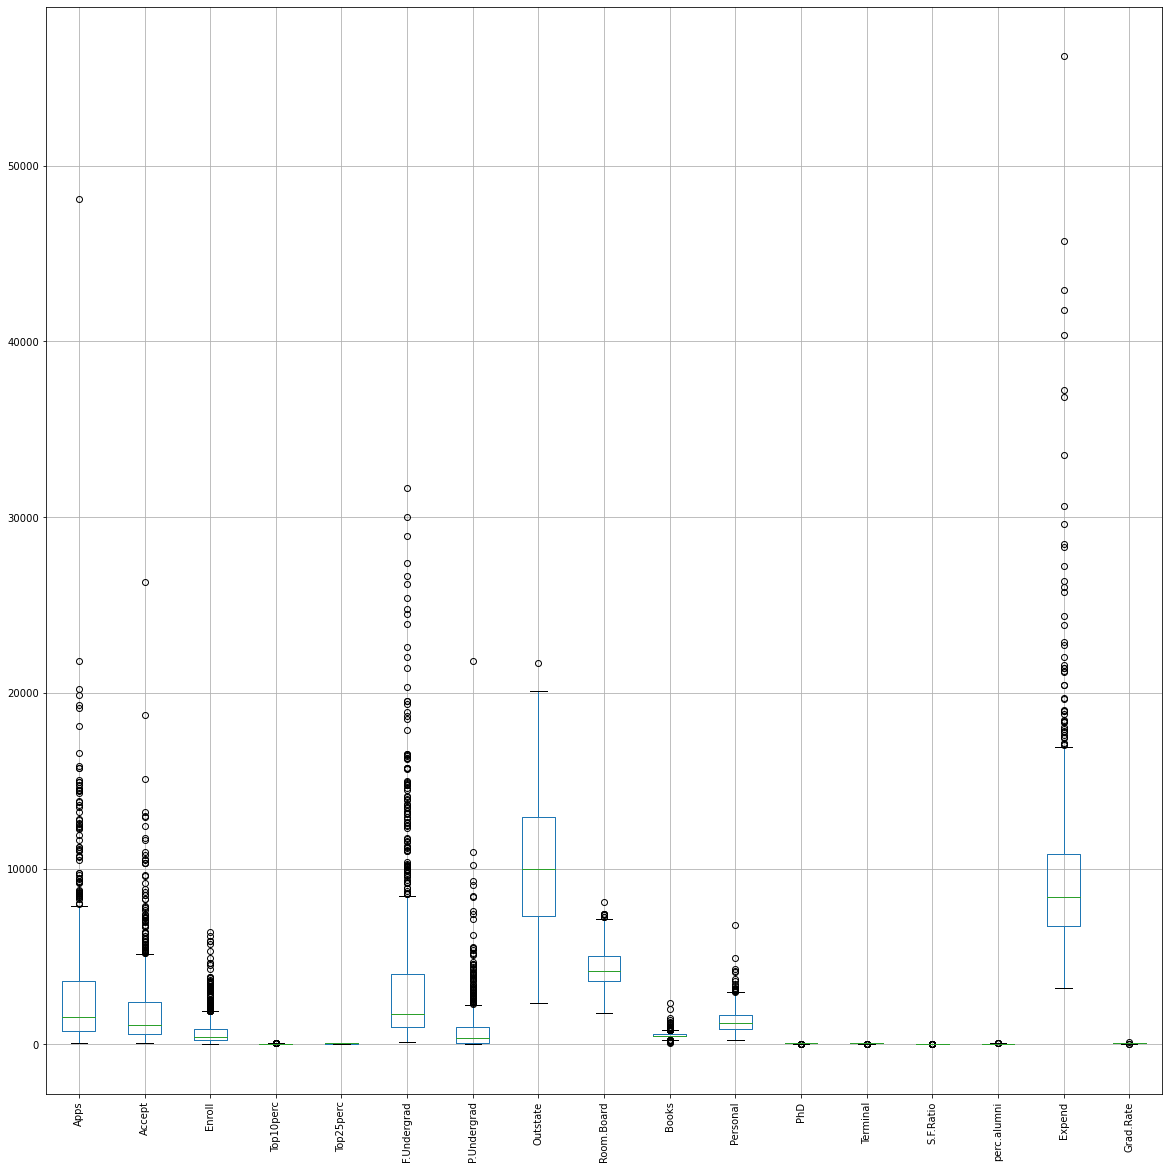

In [236]:
d_edu.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()



In [238]:
print("DATA AFTER SCALING")
df_num_scaled.head()


DATA AFTER SCALING


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.383829 -0.353198 -0.035012  -0.246781  -0.191827    -0.179951   
1 -0.215156  0.003214 -0.302696  -0.696290  -1.353911    -0.225740   
2 -0.458225 -0.422730 -0.528115  -0.310996  -0.292878    -0.599082   
3 -0.782423 -0.807984 -0.782992   2.129195   1.677612    -0.718316   
4 -0.854253 -0.912539 -0.888017  -0.696290  -0.596031    -0.777479   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.220908 -0.747173   -0.976849 -0.807146  1.534067 -0.189281 -0.135735   
1     0.513397  0.459655    1.959843  1.912681  0.325766 -2.826575 -1.917777   
2    -0.687032  0.202830   -0.557322 -1.260450 -0.252493 -1.282793 -0.984326   
3    -0.725344  0.629209    1.027560 -0.807146 -0.753075  1.225853  1.207869   
4     0.132410 -0.717252   -0.212377  2.054112  0.325766  0.196665 -0.560031   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.107193    -0.877388 -0.621979  -0.327324  
1  -0.502762    -0.547691  0.361374  -0.564340  
2  -0.311750     0.606247 -0.144125  -0.682848  
3  -1.730694     1.183216  2.462296  -0.386578  
4  -0.584624    -1.701629  0.472798  -1.690169

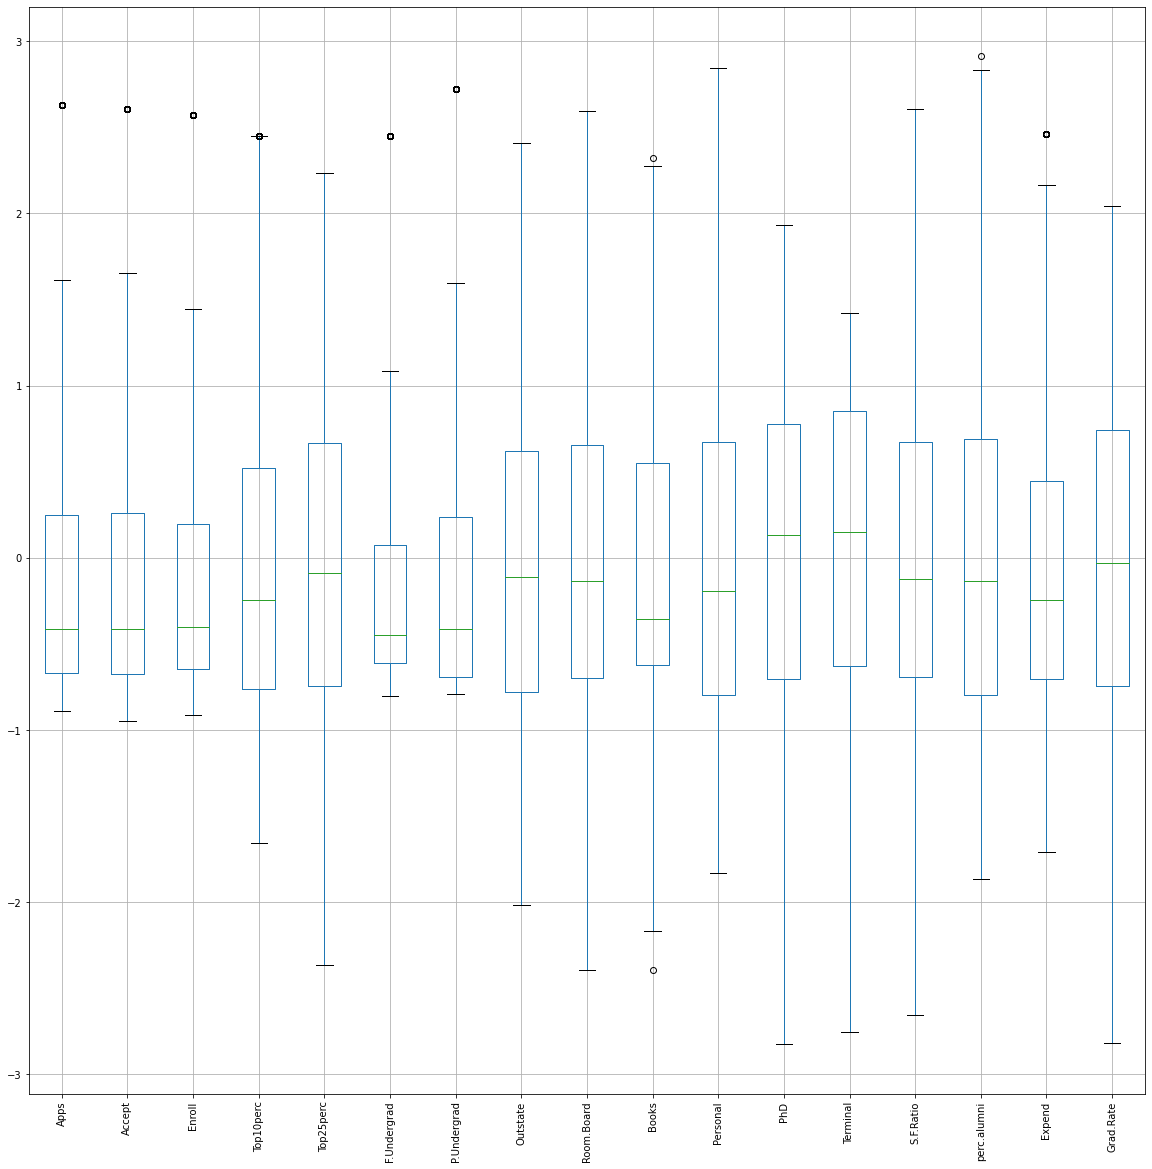

In [240]:
df_num_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()


### Inference:

* As observed the <b>data before scaling</b> is hard to understand, apart from that the boxplot seems monotonous where almost all variables except Top25perc have a lot of outliers present. 
* Moreover from the boxplot it was difficult the understand the descriptive statistics of the data like the Inter Quartile Range, Median, Min and Max value.


* As observed the <b>data after scaling</b> is easy to understand as most of the values lie in a specific value range, apart from that  the boxplot seems a lot better where the data is easy to understand and the median lie around 0 and this serves as a good method for treating outliers as most of the variables are now free from outliers.

* Moreover from the boxplot it was difficult the understand the descriptive statistics of the data like the Inter Quartile Range, Median, Min and Max value.

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H$_0$: All variables in the data are uncorrelated
- H$_a$: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [241]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
print("p_value = ",p_value)

p_value =  0.0


#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [242]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
print("MSA = ",kmo_model)

MSA =  0.8561695549735029


### Both Test passed, we can successfully recommend and perform PCA

In [268]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('__________Covariance Matrix_____________ \n\n%s', cov_matrix)

__________Covariance Matrix_____________ 

%s [[ 1.00128866e+00  9.34924522e-01  8.71047851e-01  3.23870237e-01
   3.62868715e-01  8.17850066e-01  5.01757457e-01  6.32865674e-02
   1.82959147e-01  2.33291015e-01  2.29533091e-01  4.46769909e-01
   4.17266656e-01  1.14213807e-01 -1.00610235e-01  2.54533823e-01
   1.47156965e-01]
 [ 9.34924522e-01  1.00128866e+00  9.22355696e-01  2.20538040e-01
   2.68343861e-01  8.71549611e-01  5.56937826e-01 -1.42554840e-02
   1.10325234e-01  2.13905650e-01  2.56349672e-01  4.07561902e-01
   3.84055661e-01  1.82533467e-01 -1.62609751e-01  1.66268254e-01
   6.95416281e-02]
 [ 8.71047851e-01  9.22355696e-01  1.00128866e+00  1.67342532e-01
   2.24859762e-01  9.48490114e-01  6.42498582e-01 -1.60758239e-01
  -3.72502918e-02  2.13398113e-01  3.47533881e-01  3.61278980e-01
   3.36082067e-01  2.67904002e-01 -2.13741732e-01  5.73414255e-02
  -4.05441513e-02]
 [ 3.23870237e-01  2.20538040e-01  1.67342532e-01  1.00128866e+00
   9.15052727e-01  1.03655350e-01 -1.46

### Extracting the eigenvalues, and eigenvectors.

In [174]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', np.round(eig_vals,2))
print('\n')
print('Eigen Vectors \n %s', np.round(eig_vecs,2))


 Eigen Values 
 %s [5.64 4.83 1.1  1.   0.9  0.77 0.59 0.55 0.44 0.38 0.25 0.04 0.06 0.07
 0.12 0.14 0.15]


Eigen Vectors 
 %s [[ 0.24  0.32  0.1  -0.1   0.23 -0.05  0.01 -0.03 -0.18 -0.13 -0.07 -0.15
   0.57  0.03  0.35 -0.48 -0.03]
 [ 0.21  0.36  0.13 -0.12  0.2  -0.03 -0.   -0.1  -0.19 -0.12 -0.03  0.45
  -0.64 -0.04  0.11 -0.21 -0.13]
 [ 0.16  0.4   0.09 -0.01  0.17  0.04  0.01 -0.13 -0.05 -0.05 -0.02 -0.75
  -0.26  0.03 -0.23  0.27 -0.02]
 [ 0.34 -0.08 -0.07  0.38  0.15  0.08  0.26  0.29  0.11 -0.07 -0.01  0.06
  -0.05  0.72 -0.03 -0.02  0.05]
 [ 0.34 -0.04 -0.05  0.43  0.12  0.02  0.23  0.34  0.19 -0.05 -0.13 -0.01
  -0.   -0.66  0.03  0.03 -0.16]
 [ 0.13  0.41  0.09 -0.01  0.12  0.05  0.03 -0.12  0.    0.01 -0.04  0.45
   0.41 -0.01 -0.35  0.52  0.08]
 [ 0.01  0.35  0.04 -0.21 -0.13  0.05  0.09  0.05  0.74  0.42  0.19  0.
  -0.03  0.04  0.1  -0.16 -0.04]
 [ 0.3  -0.24  0.02 -0.25  0.04  0.01 -0.1   0.02  0.01 -0.19  0.61 -0.
   0.1   0.   -0.22  0.01 -0.56]
 [ 0.25 -0.12 -0.03

### Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

In [30]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", np.round(cum_var_exp,2))


Cumulative Variance Explained [ 33.15  61.53  67.99  73.84  79.12  83.62  87.07  90.32  92.93  95.17
  96.61  97.48  98.28  99.    99.44  99.77 100.  ]


* The first cumulative variance of 33.15% Eigen value which will be highest among all explaining the most variance  which is attained in the first PC, further 61.53% is the variance obtained from the remaining data after 33.15% has been attained.
*  Further the loadings on all factors/columns that will be the Eigen vectors on each columns are better represented on the heatmap what we have futher represented.
* The first component PC0 covers the columns Outstate and Expend is represented pc_Outstate_Expend.
* The second component PC1 covers the columns Apps, Accept, Enroll, F.Undergrad, P.Undergrad is represented pc_Applicants_info.
* The third component PC2 covers the columns Books is represented pc_Books.
* The fourth component PC3 covers the columns Top25perc, Top10perc, Room.Board is represented pc_Top.
* The fifth component PC4 covers the columns PhD, Terminal is represented pc_Edu_Level.
* The sixth component PC5 covers the columns S.F.Ratio is represented pc_S.F.Ratio.
* The seventh component PC6 covers the columns Personal, GradRate is represented pc_Spending_GradRate.
* The eighth component PC7 covers the columns perc.alumni is represented pc_Donation.

### Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

* The cumulative variance helps us decide the no. of components we want where the components are used to accumuloate the variability in the data.
* The more variability we can catch in minimum steps, the better.
* Here choosing 8 components as it catches around 90% variability in the data
* However we can choose more components as well according to our ease and requirement if we want to capture more variability.

* The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The <b>eigenvectors</b> (principal components) determine the directions of the new feature space, and the <b>eigenvalues</b> determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

### Scree Plot

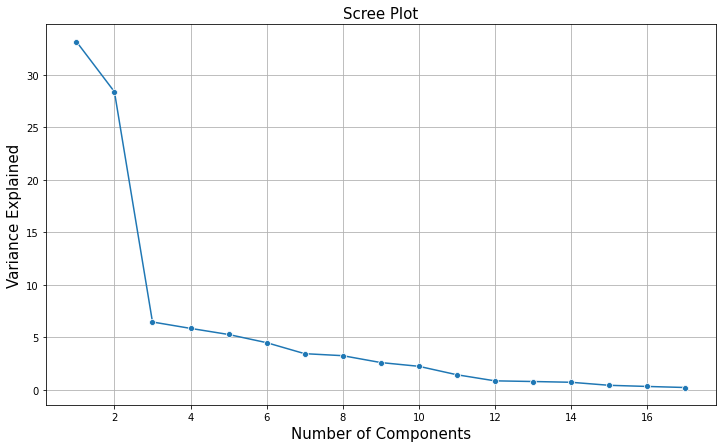

In [177]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

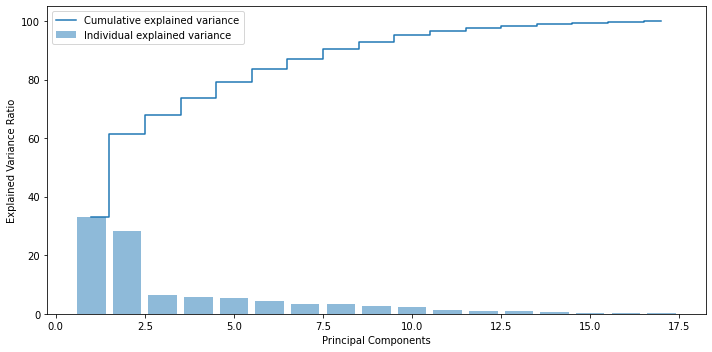

In [197]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

* The Visualisation technique helps us determine the no. of Principal Components we want to use.


### Reducing Dimensions from 17 to 8 and storing the pca components in a dataframe.

In [272]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output
print("_______________________________________DIMENSION REDUCTION_______________________________\n")
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

_______________________________________DIMENSION REDUCTION_______________________________



array([[-1.73684181, -1.59837458, -1.54272978, ..., -0.67398706,
         6.65759091, -0.62185787],
       [ 0.786421  , -0.33201905, -1.37933098, ..., -0.14337982,
        -1.0886135 ,  0.63046495],
       [ 0.09147599,  2.12839835, -0.60263739, ...,  0.37345002,
         1.41379463, -1.31483666],
       ...,
       [-0.76547572,  1.36439619, -0.96582161, ...,  0.53049868,
        -0.67402554,  1.15210696],
       [ 0.87840408, -0.33911049, -0.17414585, ..., -1.46123874,
         1.27803591,  0.98186075],
       [ 0.97763511,  0.22029317, -0.332578  , ..., -0.17256962,
         0.10158373,  0.43332558]])

In [179]:
df_pca_df= pd.DataFrame(df_pca)
df_pca_df.head()

0         1         2         3         4         5         6  \
0 -1.736901  0.786523  0.091334 -1.018149 -0.351402 -0.765610  0.879426   
1 -1.598136 -0.332040  2.129009  2.898618  1.927792  1.364933 -0.337346   
2 -1.542800 -1.379268 -0.602489  0.005509  0.955652 -0.965602 -0.174358   
3  3.181988 -2.993983  0.335530 -0.456311 -0.915076 -1.753031 -1.261560   
4 -1.785881 -0.202226  2.731233  0.689054 -1.194913  0.174538 -1.369389   

          7  
0  0.976811  
1  0.219223  
2 -0.332625  
3  0.241643  
4  0.101444

In [271]:
# Loading of each feature on the components
print("__________________________________________PCA COMPONENTS____________________________________\n")
pca.components_

__________________________________________PCA COMPONENTS____________________________________



array([[ 0.24267124,  0.20809588,  0.16456427,  0.34463353,  0.3378584 ,
         0.13428768,  0.01451289,  0.29730457,  0.25119209,  0.09356817,
        -0.04846688,  0.32466756,  0.32050992, -0.17847668,  0.19861754,
         0.340157  ,  0.24864478],
       [ 0.3249305 ,  0.35775585,  0.3958243 , -0.07539008, -0.03672114,
         0.40624367,  0.35491664, -0.23736241, -0.12378905,  0.10601539,
         0.23546922,  0.07065176,  0.0596664 ,  0.2478349 , -0.24326185,
        -0.13574786, -0.16060776],
       [-0.09771002, -0.12514402, -0.09444194,  0.07238665,  0.04633683,
        -0.08723973, -0.03869648, -0.02059084,  0.0260694 ,  0.71355799,
         0.52183434, -0.0572581 , -0.03745778, -0.25837556, -0.10990665,
         0.17292969, -0.23102815],
       [ 0.10255977,  0.12191424,  0.01424972, -0.37556323, -0.42787637,
         0.01461658,  0.20726537,  0.25385171,  0.56679378, -0.04727896,
        -0.10787843, -0.12347098, -0.07314694, -0.28302404, -0.22994443,
         0.22017626

### Let's create a dataframe of component loading against each field and identify the pattern

In [273]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))

In [246]:
df_pca_loading.head(8)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.242671  0.208096  0.164564   0.344634   0.337858     0.134288   
1  0.324930  0.357756  0.395824  -0.075390  -0.036721     0.406244   
2 -0.097710 -0.125144 -0.094442   0.072387   0.046337    -0.087240   
3  0.102560  0.121914  0.014250  -0.375563  -0.427876     0.014617   
4  0.228743  0.202792  0.172168   0.145905   0.120537     0.115073   
5  0.047641  0.033134 -0.038976  -0.083767  -0.021492    -0.054996   
6 -0.012378  0.001415 -0.007928  -0.258268  -0.234717    -0.027916   
7 -0.034103 -0.102522 -0.134762   0.289095   0.336249    -0.122385   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.014513  0.297305    0.251192  0.093568 -0.048467  0.324668  0.320510   
1     0.354917 -0.237362   -0.123789  0.106015  0.235469  0.070652  0.059666   
2    -0.038696 -0.020591    0.026069  0.713558  0.521834 -0.057258 -0.037458   
3     0.207265  0.253852    0.566794 -0.047279 -0.107878 -0.123471 -0.073147   
4    -0.132039  0.042968   -0.090207 -0.016630  0.062935 -0.547357 -0.585124   
5    -0.051645 -0.013967    0.257757  0.608724 -0.384138 -0.062174 -0.047922   
6    -0.093659  0.104399    0.125975 -0.139286  0.656949  0.096114  0.098447   
7     0.054191  0.023889    0.355686 -0.256097  0.251642 -0.047057 -0.116058   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.178477     0.198618  0.340157   0.248645  
1   0.247835    -0.243262 -0.135748  -0.160608  
2  -0.258376    -0.109907  0.172930  -0.231028  
3  -0.283024    -0.229944  0.220176  -0.074147  
4  -0.226759     0.138310  0.028307   0.287880  
5   0.442094    -0.005596 -0.238206   0.372585  
6   0.174587     0.321858 -0.150524   0.463708  
7   0.215538    -0.635277 -0.086414   0.162586

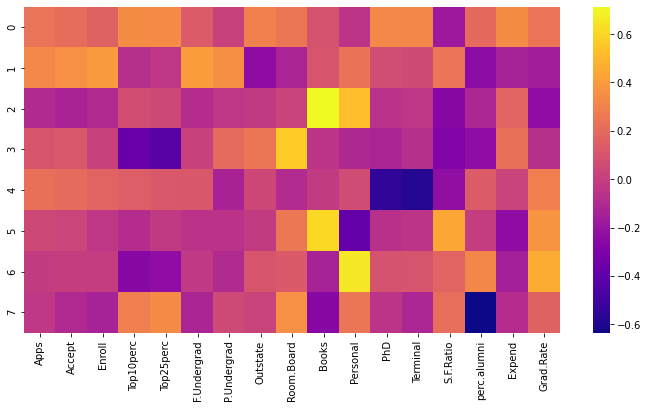

In [247]:
plt.figure(figsize=(12,6))
sns.heatmap(df_pca_loading,cmap='plasma');

#### Let's identify which features have maximum loading across the components.

- We will first plot the component loading on a heatmap.

- For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

- Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [199]:
from matplotlib.patches import Rectangle

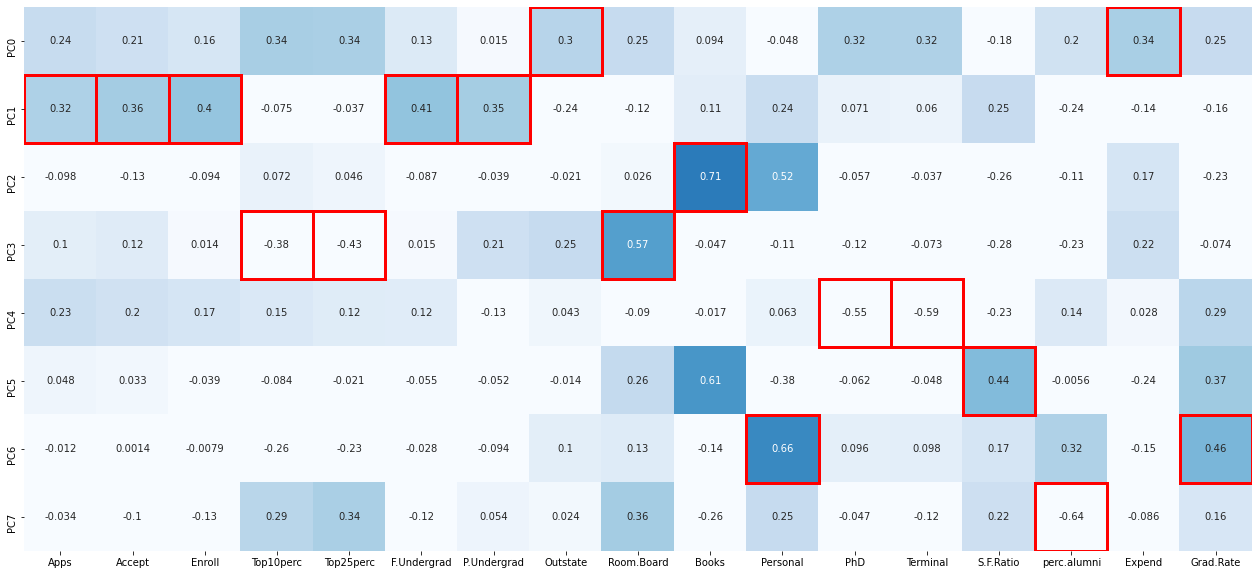

In [200]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0) #Return index of the maximum element.

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

### Changing PC0,PC1 etc, names to better represent our data

In [275]:
df_pca = pd.DataFrame(df_pca,columns=['pc_Outstate_Expend','is re','pc_books','pc-Top',
                                  'pc_Edu_level','pc_S.F.Ratio','pc_Spending_GradRate','pc_Donation'])
df_pca.head(10)

pc_Outstate_Expend  pc_Applicants_info  pc_books    pc-Top  pc_Edu_level  \
0           -1.736842            0.786421  0.091476 -1.018426     -0.351102   
1           -1.598375           -0.332019  2.128398  2.899583      1.926571   
2           -1.542730           -1.379331 -0.602637  0.005869      0.955341   
3            3.183441           -2.994215  0.335945 -0.458811     -0.914927   
4           -1.786026           -0.202248  2.731255  0.688644     -1.195192   
5           -0.548988           -1.824067  0.164506 -0.212304      0.244592   
6            0.232041           -1.661680  0.276382  0.956888     -1.712681   
7            1.905101           -1.642205 -0.987996 -0.498710     -1.038787   
8            0.798220           -2.344292 -1.933801  0.353697     -0.240762   
9           -2.837089           -1.027102  2.106536  0.261555      2.173884   

   pc_S.F.Ratio  pc_Spending_GradRate  pc_Donation  
0     -0.765476              0.878404     0.977635  
1      1.364396             -0.339110     0.220293  
2     -0.965822             -0.174146    -0.332578  
3     -1.753068             -1.262803     0.240816  
4      0.174845             -1.369235     0.099036  
5     -0.840058             -1.791963     0.350018  
6     -0.370406              0.988645     0.063645  
7     -0.255788              0.226808    -0.304200  
8     -0.984280             -0.303120     0.497005  
9     -0.124081             -0.535983     0.088048

In [276]:
print('Number of rows in the dataset  = %d' % (df_pca.shape[0]))
print('Number of columns in the dataset after PCA is performed = %d' % (df_pca.shape[1]))

Number of rows in the dataset  = 777
Number of columns in the dataset after PCA is performed = 8


In [277]:
df_new = pd.concat([df_cat, df_pca], axis=1)
df_new.head()

Names  pc_Outstate_Expend  pc_Applicants_info  \
0  Abilene Christian University           -1.736842            0.786421   
1            Adelphi University           -1.598375           -0.332019   
2                Adrian College           -1.542730           -1.379331   
3           Agnes Scott College            3.183441           -2.994215   
4     Alaska Pacific University           -1.786026           -0.202248   

   pc_books    pc-Top  pc_Edu_level  pc_S.F.Ratio  pc_Spending_GradRate  \
0  0.091476 -1.018426     -0.351102     -0.765476              0.878404   
1  2.128398  2.899583      1.926571      1.364396             -0.339110   
2 -0.602637  0.005869      0.955341     -0.965822             -0.174146   
3  0.335945 -0.458811     -0.914927     -1.753068             -1.262803   
4  2.731255  0.688644     -1.195192      0.174845             -1.369235   

   pc_Donation  
0     0.977635  
1     0.220293  
2    -0.332578  
3     0.240816  
4     0.099036

### Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

* Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible and retaining most of the information.
* Here we performed PCA after performing the necessary EDA as junk data will affect our calculations which we do not want.
* After getting a green signal to perform PCA from the necessary tests, the covariance matrix was made which tells us about the variance between two variables.
* This covariance matrix is further converted to eigen vectors and values which will help us to obtain the cumulative variance.
* The cumulative variance is the most important part of PCA as it provides us the information on the number of componens we need to use for dimension reduction.
* As observed the first PC catches 33% of the variability, second PC catches the remaining 61% of the varibility similarly it gives us the information untill 100% of the variability is captured.
* However even if we can successfully accumulate atleast 80% of the variability of from the data under minimum components, then it will be deemed as a successfull PCA.
* In our case study, 8 components are used as they catch 90% of the varibility which will ensure the dimension reduction is achieved and the information is retained as well.
* After obtaining the components, plotting the components gives us a better insight on how the variability is obtained, the most useful being the Scree PLot.
* Hence for every business obtaining the principal components are what we should aim for as they will lead to better decision making.


### By:- Tushar Babbar